### Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Import the data

In [2]:
df = pd.read_csv('all_data.csv')
# inspect the first few rows
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
# Which countries are included?
df['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [4]:
# Each country as a dataframe
cl = df[df['Country'] == 'Chile']
cn = df[df['Country'] == 'China']
de = df[df['Country'] == 'Germany']
mx = df[df['Country'] == 'Mexico']
us = df[df['Country'] == 'United States of America']
zw = df[df['Country'] == 'Zimbabwe']

### Check life expectancy among all the countries

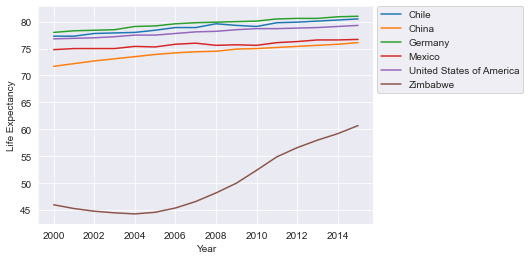

In [5]:
sns.set_style('darkgrid')
ax = sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue='Country')
ax.set_ylabel('Life Expectancy')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

### Check GDP among all the countries

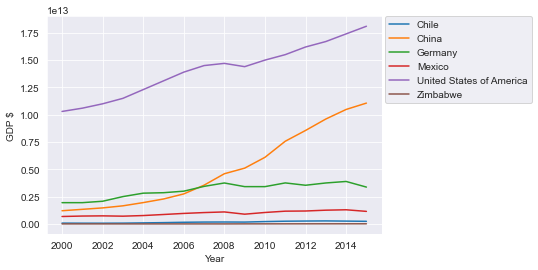

In [6]:
ax = sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
ax.set_ylabel('GDP $')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

### Zimbabwe has both the lowest life expectancy and the lowest GDP

In [7]:
# Average life expectancy in Zimbabwe
zw_le = zw['Life expectancy at birth (years)']
avg_zw_le = round(np.mean(zw_le), 2)
print(f'Average life expectancy in Zimbabwe: {str(avg_zw_le)}')

Average life expectancy in Zimbabwe: 50.09


### How does this stack up to the others?

In [8]:
others = df[df['Country'] != 'Zimbabwe']
others_le = others['Life expectancy at birth (years)']
avg_others_le = round(np.mean(others_le), 2)
print(f'Average life expectancy in the other countries: {str(avg_others_le)}')

Average life expectancy in the other countries: 77.33


### Let's look at this graphically

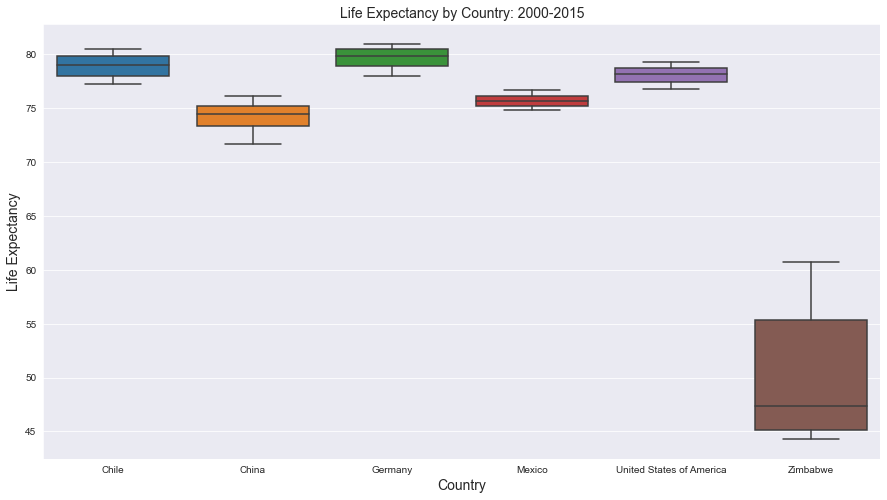

In [9]:
# Boxplot of the all the countries' life expectancy data
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=df['Country'], y=df['Life expectancy at birth (years)'])
plt.title('Life Expectancy by Country: 2000-2015', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Life Expectancy', fontsize=14)
plt.show()

### Note the disparity in the graph above. While Zimbabwe improved its life expectancy from 2000-2015, its starting point was much lower than the others. In 2000, its life expectancy was around 46 and it rose to around 60 by 2015. The other countries, by contrast, all started at a life expectancy of > 70 in 2000. There also isn't much variation in the distribution of life expectancy in the other countries.

### What about GDP?

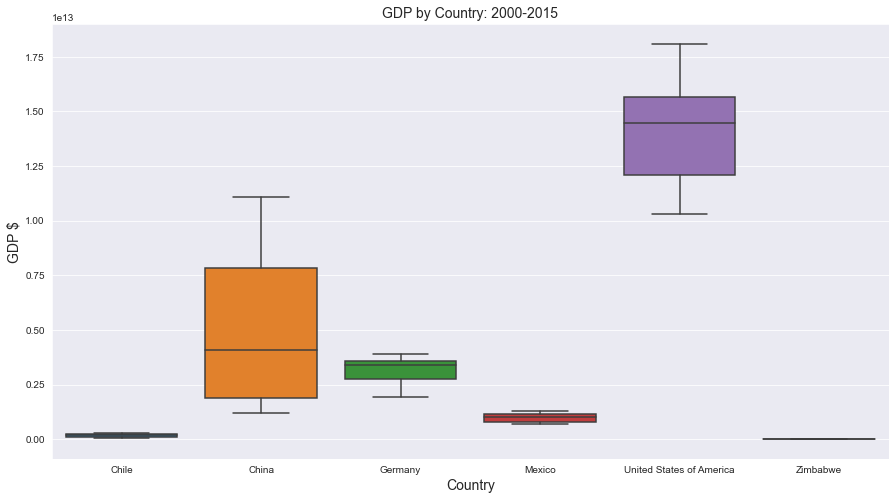

In [10]:
# Boxplot of each country's GDP from 2000-2015
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=df['Country'], y=df['GDP'])
plt.title('GDP by Country: 2000-2015', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('GDP $', fontsize=14)
plt.show()

### Only China, the US, and Germany had any discernable GDP growth during this time. Mexico's grew only slightly. Zimbabwe's was flat and had little to no growth.

### Let's look at it another way, first with life expectancy:

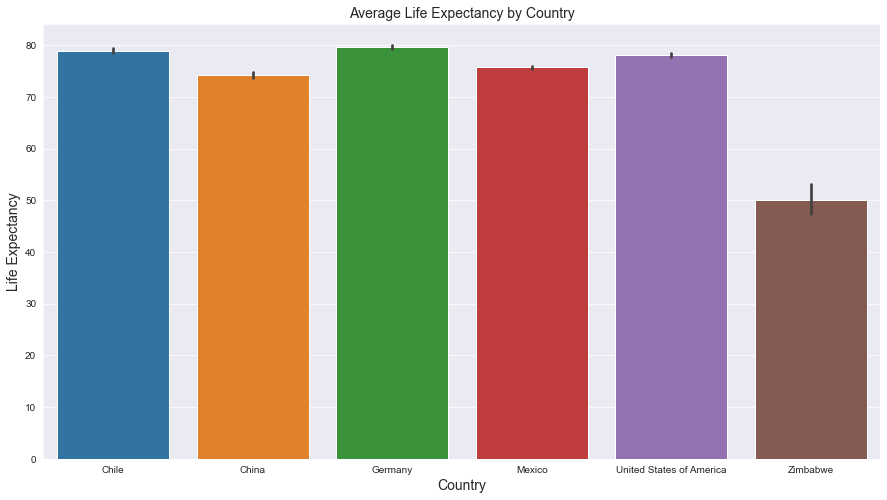

In [11]:
# Bar chart
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=df, x='Country', y='Life expectancy at birth (years)')
plt.title('Average Life Expectancy by Country', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Life Expectancy', fontsize=14)
plt.show()

### Now with GDP:

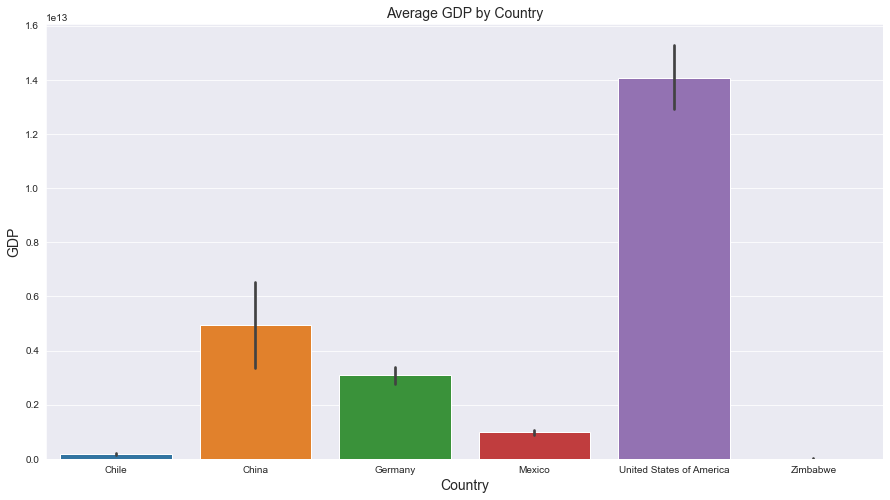

In [12]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=df, x='Country', y='GDP')
plt.title('Average GDP by Country', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('GDP', fontsize=14)
plt.show()

### Relationship between Life Expectancy and GDP?

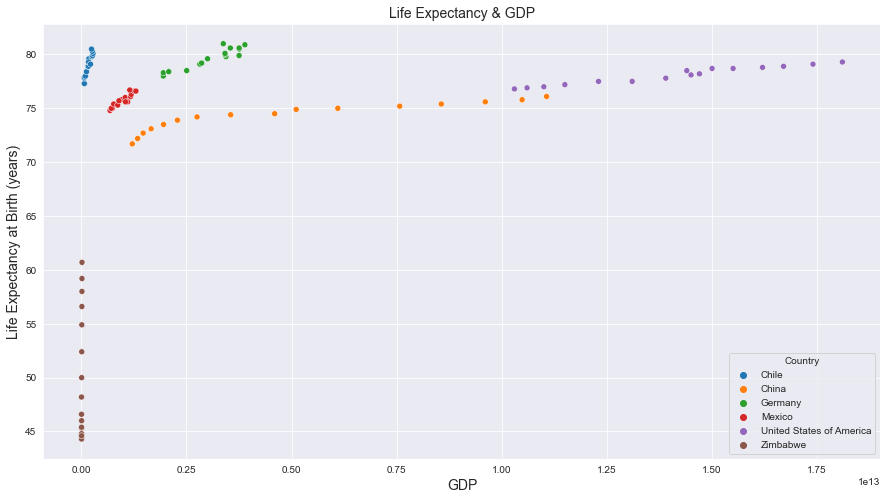

In [13]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df, x='GDP', y='Life expectancy at birth (years)', hue='Country')
plt.title('Life Expectancy & GDP', fontsize=14)
plt.xlabel('GDP', fontsize=14)
plt.ylabel('Life Expectancy at Birth (years)', fontsize=14)
plt.show()

### Let's look at the minimum and maximum values for life expectancy in Zimbabwe and the rest of the countries in the dataset:

In [22]:
zw_min_le = zw_le.min()
zw_max_le = zw_le.max()

others_min_le = others_le.min()
others_max_le = others_le.max()

zw_percentage_chg = round((zw_max_le - zw_min_le) / zw_min_le * 100, 2)
others_percentage_chg = round((others_max_le - others_min_le) / others_min_le * 100, 2)

print(f'Zimbabwe minimum life expectancy: {str(zw_min_le)}')
print(f'Zimbabwe maximum life expectancy: {str(zw_max_le)}')
print('')
print(f'Minimum life expectancy in the other countries: {str(others_min_le)}')
print(f'Maximum life expectancy in the other countries: {str(others_max_le)}')
print('')
print(f'Life expectancy percentage change in Zimbabwe: {str(zw_percentage_chg)}%')
print(f'Life expectancy percentage change in the other countries: {others_percentage_chg}%')

Zimbabwe minimum life expectancy: 44.3
Zimbabwe maximum life expectancy: 60.7

Minimum life expectancy in the other countries: 71.7
Maximum life expectancy in the other countries: 81.0

Life expectancy percentage change in Zimbabwe: 37.02%
Life expectancy percentage change in the other countries: 12.97%


#### Note: Zimbabwe had a dramatic increase in life expectancy, increasing by 37%, while the others' life expectancy combined grew by almost 13%. As the last graph above shows, Zimbabwe's GDP was static for the entire time period, so GDP doesn't appear to explain that.

### Analysis:

Zimbabwe had the most dramatic increase in life expectancy. However, it had little to no GDP growth as it was static from 2000 to 2015. The other countries enjoyed moderate life expectancy growth along with varying degres of GDP growth. That suggests some correlation between GDP and life expectancy. However, what explains Zimbabwe's increase in life expectancy? We may need to conduct further analysis using other variables to see what other factors came into play. Perhaps there was international assistance the helped improve the population's health, or other factors that may have contributed to increasing life expectancy.